%%bash
pip install -r requirements.txt

In [8]:
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1024, 768))
display.start()
import os
os.environ["DISPLAY"] = ":" + str(display.display) + "." + str(display.screen)

In [11]:
import gym
env = gym.make("MountainCar-v0")
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import numpy as np
import pandas as pd

# ここからサンプル

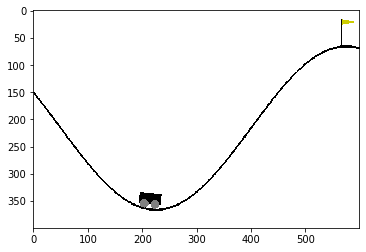

In [12]:
#ゲーム環境のリセット
observation = env.reset()

#画像の準備
fig = plt.figure()
ims = []

#繰り返し操作して画面を表示
for i in range(200):
    action = np.random.randint(0, 2)
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)

    im = plt.imshow(env.render(mode='rgb_array'))
    ims.append([im])
    
    if done == True:
        break

In [5]:
ani = animation.ArtistAnimation(fig, ims, interval=15, blit=True)
rc('animation', html='jshtml')
ani

# ここから色々

In [14]:
%%time
#ゲーム環境のリセット
observation = env.reset()
actions = list()

#繰り返し操作して画面を表示
for i in range(200):
    action = np.random.randint(0, 2)
    action = env.action_space.sample()
    actions.append(action)
    observation, reward, done, info = env.step(action)
    if done == True:
        break

CPU times: user 6.28 ms, sys: 0 ns, total: 6.28 ms
Wall time: 6.1 ms


実行速度は速い

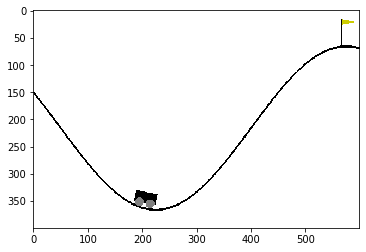

In [48]:
#ゲーム環境のリセット
observation = env.reset()
obs =[]

#画像の準備
fig = plt.figure()
ims = []

action =1
#繰り返し操作して画面を表示
for i in range(200):
    action = not action
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    obs.append(observation)

    im = plt.imshow(env.render(mode='rgb_array'))
    ims.append([im])
    
    if done == True:
        break

In [49]:
observation

array([-0.59064247, -0.00107115])

In [50]:
ps = []
vs = []
for p, v in obs:
    p, v = str(p), str(v)
    p, v = len(p)-1, len(v)-1
    ps.append(p)
    vs.append(v)

print("けたp,けたv")
print(np.mean(ps),np.mean(vs))

けたp,けたv
17.98 20.24


観測桁数は多い => p, vをそのままxiとして使うのは難しい

## vの正負によるaction選択

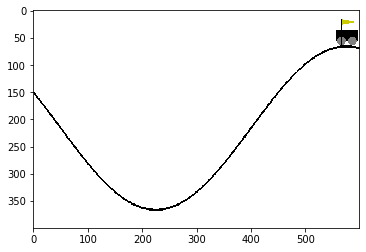

In [25]:
#ゲーム環境のリセット
observation = env.reset()
obs = []
acs = []
v = 0
pb = 0

#画像の準備
fig = plt.figure()
ims = []

#繰り返し操作して画面を表示
for i in range(200):
    if v >= 0:
        action = 2
    else:
        action = 0
    acs.append(action)
    observation, reward, done, info = env.step(action)
    obs.append(observation)
    
    v = observation[1]

    im = plt.imshow(env.render(mode='rgb_array'))
    ims.append([im])
    
    if done == True:
        break

In [26]:
ani = animation.ArtistAnimation(fig, ims, interval=15, blit=True)
rc('animation', html='jshtml')
ani

単純なものでクリア可能だった

vをxiにする？

単純すぎて面白みに欠ける。

$$ x_i = (\frac{p}{|p|}, v)$$
でどうだ

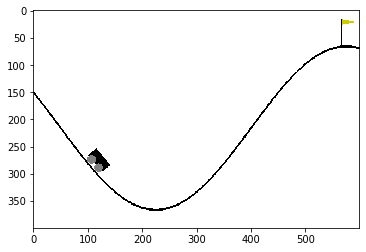

In [13]:
#ゲーム環境のリセット
observation = env.reset()
obs = []
acs = []
v = 0
pb = 0

#画像の準備
fig = plt.figure()
ims = []

#繰り返し操作して画面を表示
for i in range(200):
    action = 0
    acs.append(action)
    observation, reward, done, info = env.step(action)
    obs.append(observation)
    
    v = observation[1]

    im = plt.imshow(env.render(mode='rgb_array'))
    ims.append([im])
    
    if done == True:
        break

In [14]:
observation

array([-0.8818311 ,  0.00417799])

In [15]:
v

0.004177987967873347

In [16]:
ani = animation.ArtistAnimation(fig, ims, interval=15, blit=True)
rc('animation', html='jshtml')
ani

In [19]:
obs

[array([-0.45427897, -0.00152736]),
 array([-0.4573225 , -0.00304352]),
 array([-0.46185982, -0.00453732]),
 array([-0.46785755, -0.00599772]),
 array([-0.47527138, -0.00741384]),
 array([-0.48404641, -0.00877502]),
 array([-0.49411738, -0.01007097]),
 array([-0.50540917, -0.01129179]),
 array([-0.51783732, -0.01242815]),
 array([-0.53130868, -0.01347136]),
 array([-0.54572222, -0.01441354]),
 array([-0.56096995, -0.01524773]),
 array([-0.57693799, -0.01596804]),
 array([-0.59350769, -0.0165697 ]),
 array([-0.6105569 , -0.01704922]),
 array([-0.62796131, -0.0174044 ]),
 array([-0.64559571, -0.01763441]),
 array([-0.66333544, -0.01773972]),
 array([-0.68105756, -0.01772212]),
 array([-0.69864218, -0.01758462]),
 array([-0.71597348, -0.0173313 ]),
 array([-0.73294074, -0.01696726]),
 array([-0.74943913, -0.01649839]),
 array([-0.76537036, -0.01593123]),
 array([-0.78064316, -0.0152728 ]),
 array([-0.7951736 , -0.01453043]),
 array([-0.80888519, -0.01371159]),
 array([-0.82170894, -0.0128

In [61]:
pb,vb =0,0
for p,v in obs:
    print(abs(v)-abs(vb))
    vb = v

7.331297472247949
0.6894730222720398
0.3993223919833513
0.27904247678928495
0.211968122985561
0.1685613701776214
0.1377476285034982
0.11441907106654448
0.09588765776884589
0.08060180654444782
0.06760216684860954
0.05626299645022481
0.04615813365812471
0.03698656592753746
0.028528640078094192
0.020618964024891717
0.013128831239507477
0.0059542750121197585
-0.0009924708620916434
-0.007789442807125013
-0.014510208392239043
-0.02122852312169421
-0.028022874709688672
-0.034981394315308556
-0.042207699069260585
-0.04982843745597165
-0.05800370624772988
-0.06694223794956322
-0.076924618853627
-0.0883404288067835
-0.10175054110198634
-0.11799738979011565
-0.13841303872268806
-0.1652443708471667
-0.20261672959003718
-0.2590502228398357
-0.35556040638359576
-0.5628768841119678
-1.4234702176559315
0.7677392246349903
0.9004334933013212
0.4638509432618019
0.3131075030008317
0.23529115120847344
0.18731500164136783
0.15447283173831927
0.130339088409964
0.11164918934618395
0.09656355810258965
0.083963

In [28]:
pb,vb =0,0
for p,v in obs:
    print(abs(p)-abs(pb))
    pb = p

0.4542789747756488
0.003043521446360109
0.004537324891862371
0.005997724122238757
0.007413837654212996
0.008775024641302864
0.01007097179430222
0.011291794110916742
0.012428148431992025
0.013471357183458488
0.014413538063254516
0.015247734042799888
0.015968037025760773
0.01656969797809882
0.017049216410067514
0.017404402793892326
0.017634408812335245
0.017739722153234383
0.017722124729805167
0.017584615508195234
0.017331301337885185
0.016967261096180075
0.016498389906209
0.01593123106166905
0.015272803555819725
0.014530432801102111
0.013711591330345496
0.012823755119827585
0.011874279813671507
0.010870299699509145
0.009818650908509086
0.008725819080582453
0.007597910705978039
0.006440646553242391
0.005259375018702328
0.004059102861463271
0.002844540584253097
0.0016201596416501873
0.00039025865995756526
-0.0008409641023496839
-0.0020693347708691245
-0.0032906270264320137
-0.004500487099090678
-0.005694363274628467
-0.006867442649906352
-0.008014597927089029
-0.009130347070325562
-0.0102

In [29]:
obs

[array([-0.45427897, -0.00152736]),
 array([-0.4573225 , -0.00304352]),
 array([-0.46185982, -0.00453732]),
 array([-0.46785755, -0.00599772]),
 array([-0.47527138, -0.00741384]),
 array([-0.48404641, -0.00877502]),
 array([-0.49411738, -0.01007097]),
 array([-0.50540917, -0.01129179]),
 array([-0.51783732, -0.01242815]),
 array([-0.53130868, -0.01347136]),
 array([-0.54572222, -0.01441354]),
 array([-0.56096995, -0.01524773]),
 array([-0.57693799, -0.01596804]),
 array([-0.59350769, -0.0165697 ]),
 array([-0.6105569 , -0.01704922]),
 array([-0.62796131, -0.0174044 ]),
 array([-0.64559571, -0.01763441]),
 array([-0.66333544, -0.01773972]),
 array([-0.68105756, -0.01772212]),
 array([-0.69864218, -0.01758462]),
 array([-0.71597348, -0.0173313 ]),
 array([-0.73294074, -0.01696726]),
 array([-0.74943913, -0.01649839]),
 array([-0.76537036, -0.01593123]),
 array([-0.78064316, -0.0152728 ]),
 array([-0.7951736 , -0.01453043]),
 array([-0.80888519, -0.01371159]),
 array([-0.82170894, -0.0128